# INT303 Big Data Analytics - Lab Task

##  R code (Due to the jupyter notebook format, the format will be different from the template, the 3rd part, data evidence and the 4th part, plotting, will be showned in the results, and the explanation will be after the results.)

### Import needed packages

In [ ]:
install.packages("doBy")
install.packages("ggplot2")

In [3]:
#Import packages and used library
library("doBy")
library("ggplot2")

### Set all the needed functions

In [4]:
#Set Functions

siterange <- function(x){c(length(x), min(x), max(x), mean(x))}
clen <- function(x){c(length(x))}
datasummary <- function(x){c(quantile(x),mean(x),var(x),max(x))}

## [1] For One Single Day 

### Read Data

#### Please make sure your data sets are stored in the same file with this script.

In [5]:
#Set work directory(change the working directory to your data file)
setwd("C:/Users/user1/Documents/303 lab/dds_datasets")
getwd()


[1] "C:/Users/user1/Documents/303 lab/dds_datasets"

In [6]:
#Read Data File  
data21 <- read.csv("nyt21.csv")

#Print some basic information
print(head(data21))
print(str(data21))

  Age Gender Impressions Clicks Signed_In
1   0      0           3      0         0
2   0      0           5      0         0
3  56      1           4      0         1
4  23      1           3      0         1
5   0      0           6      0         0
6  52      0           5      0         1
'data.frame':	455365 obs. of  5 variables:
 $ Age        : int  0 0 56 23 0 52 52 53 0 22 ...
 $ Gender     : int  0 0 1 1 0 0 1 1 0 0 ...
 $ Impressions: int  3 5 4 3 6 5 3 5 6 4 ...
 $ Clicks     : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Signed_In  : int  0 0 1 1 0 1 1 1 0 1 ...
NULL


##### From this code result, the first table shows the headings of the data, which is the first six data of the whole data. The second table shows the data frame of every attributes. This is just a display of basic information in the data, and for now, we have done the data inputting.

### Clean the data that are not useful

In [7]:
#Rows and columns before cleaning (just for clearly see the differences)
print(paste0("column before cleaning: ", ncol(data21)))
print(paste0("row before cleaning: ", nrow(data21)))

#Clean Data(exclude the data that have impressions<0 and age<0)
data21 <- subset(data21 , Impressions > 0)
data21 <- subset(data21 , Age > 0)

#Rows and columns after cleaning (just for clearly see the differences)
print(paste0("column after cleaning: ", ncol(data21)))
print(paste0("row after cleaning: ", nrow(data21)))

[1] "column before cleaning: 5"
[1] "row before cleaning: 455365"
[1] "column after cleaning: 5"
[1] "row after cleaning: 248734"


##### Every inputted data needed to be clean and delete the useless data. In this result, it shows the difference between the row and column before and after the cleaning data, since there are too many impressions and age that are zero which are useless data. From the result, the row declined sharply, where the column does not change because it is still five attributes. For now, the data is really to be used.

### {A} Plot the distributions of number impressions and click-through-rate (CTR=# clicks/# impressions) for the 5 age categories as "<30", "30-39","40-49", "50-59", "60+"

In [8]:
#Set agecat to put data into groups by age

data21$agecat <- cut(data21$Age,c(-Inf, 0, 30, 39, 49, 59, Inf))
summaryBy(Clicks+Impressions~agecat, data =data21)

cat("Summary of data grouped by age: \n\n")
print(summary(data21$agecat))

cat("\n Summary of data's CTR by 5 quantiles: \n\n")
print(summary(data21$Clicks/data21$Impressions))

agecat,Clicks.mean,Impressions.mean
"(0,30]",0.06791997,5.025013
"(30,39]",0.04848391,5.019251
"(39,49]",0.05079069,5.026870
"(49,59]",0.07444912,5.020989
"(59, Inf]",0.12981898,5.029539


Summary of data grouped by age: 

 (-Inf,0]    (0,30]   (30,39]   (39,49]   (49,59] (59, Inf] 
        0     69523     44984     52549     42069     39609 

 Summary of data's CTR by 5 quantiles: 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.00000 0.00000 0.00000 0.01425 0.00000 1.00000 


##### I have splitted the data into groups by age, the first shows the data number of each group, the mean of clicks and impressions are display in the table, the following is the CTR's five quantiles. From the result, the largest amount of users are age 0 to age 29, however, the largest clicks and impressions mean both goes to age above 60, which are quite interesting. 

### Plot the data into graph
#### (1) Plot impression and clicks in age groups

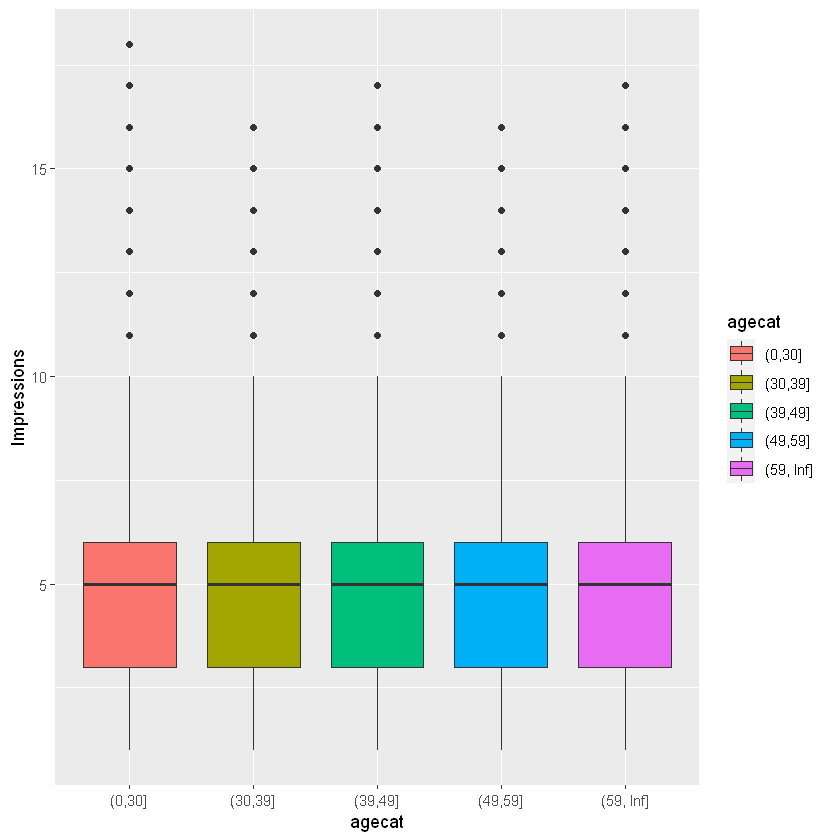

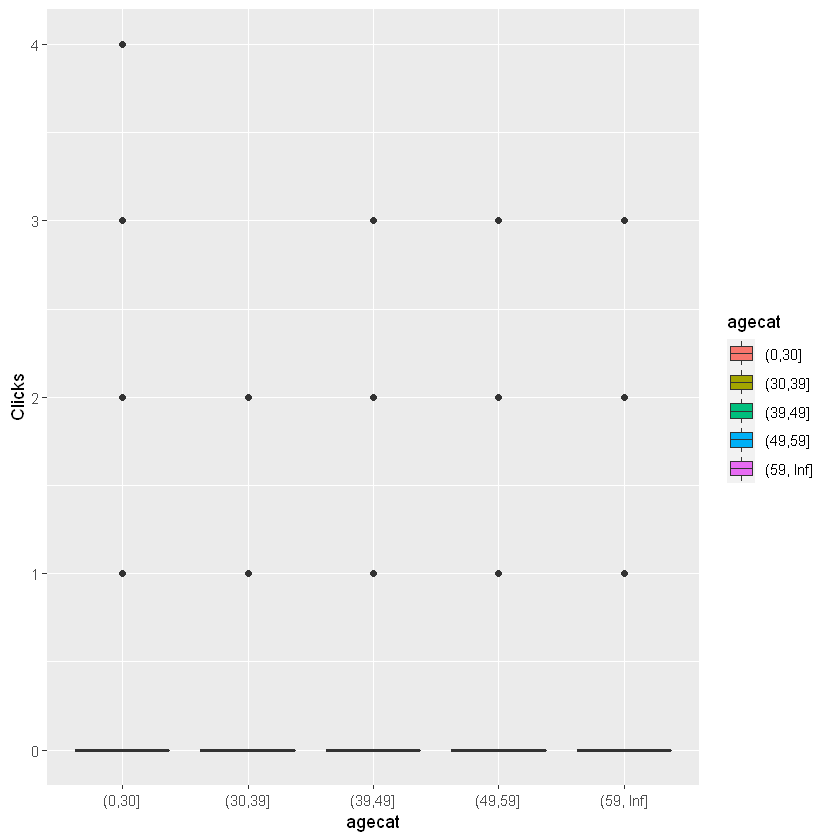

In [19]:
#Plot the data into boxplot
ggplot(data21, aes(x=agecat, y=Impressions, fill=agecat)) +
geom_boxplot()

ggplot(data21, aes(x=agecat, y=Clicks, fill=agecat)) +
geom_boxplot()

##### The two graphes shows the Impressions and Clicks grouped by age. From the plotting, the graph shows that the Impressions mean is around 5 and clicks mean goes around 0, which is a really low amount. About the impressions, it is more likely to be rating, so as the graph display, most users rate around 3 to 7, and there are some extreme rates goes above ten or even fifteen. As for the clicks, most users do not click only little amount of users clicks some times, and not a user clicks over 5 times.

#### (2) Plot CTR (Impressons > 0) in age groups

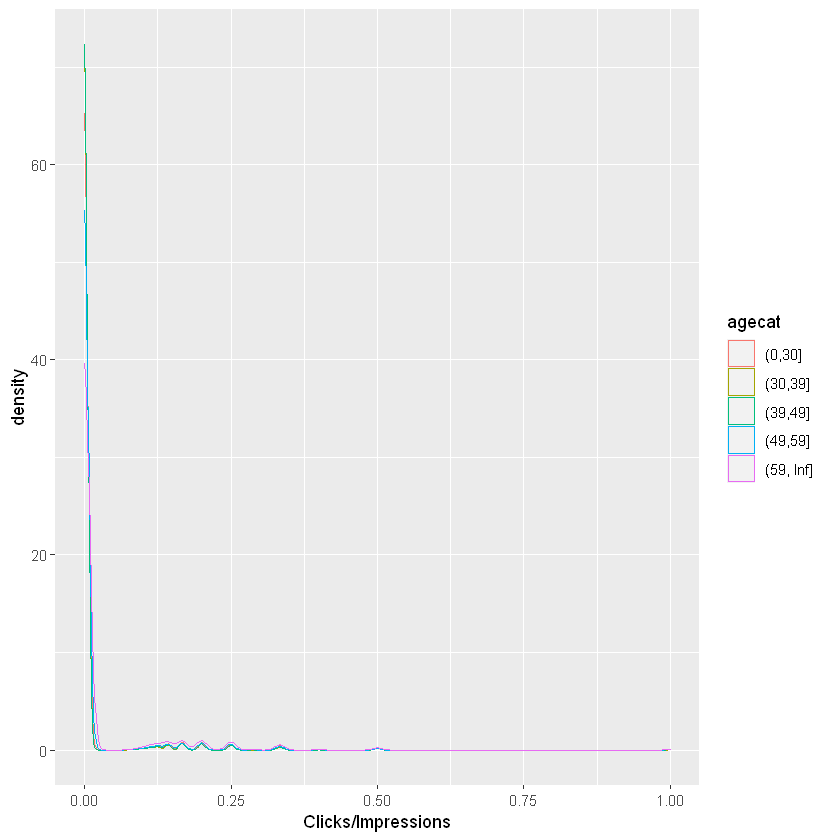

In [14]:
#Plot CTR into density graph with Impressions>0
ggplot(subset(data21, Impressions>0), aes(x=Clicks/Impressions, colour=agecat)) + geom_density()


#### (3) Plot CTR (Clicks > 0) in age groups

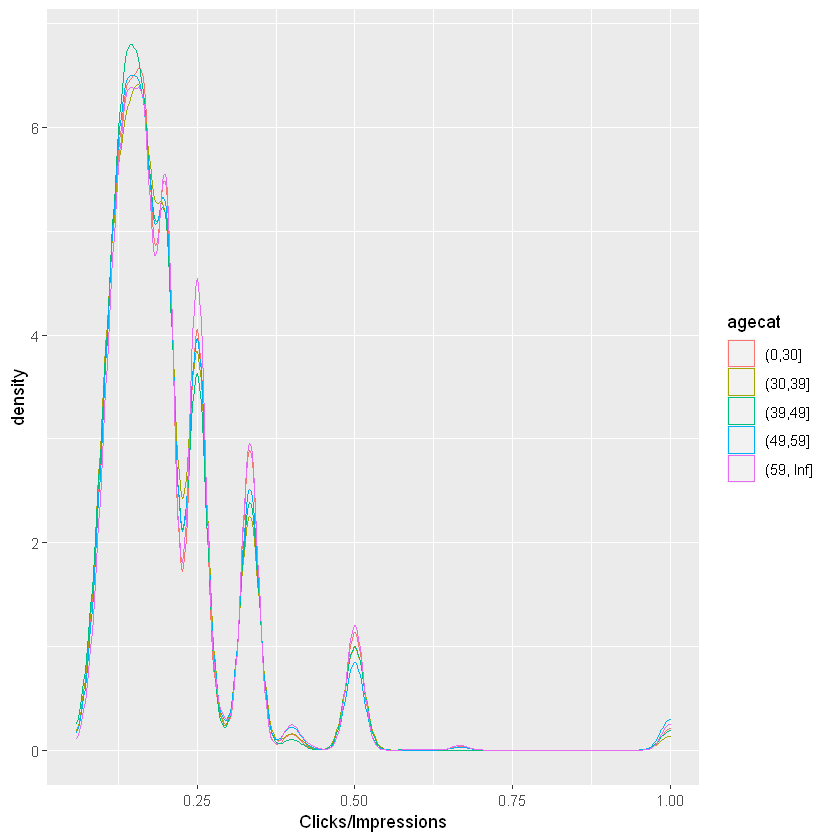

In [21]:
#Plot CTR into density graph with Clicks>0
ggplot(subset(data21, Clicks>0), aes(x=Clicks/Impressions, colour=agecat)) + geom_density()

##### These two graphes above shows the CTR by two different subset, Impressions>0 and Clicks>0 respectively. From the first graph, it demonstrats the CTR of the Impressions that are greater than 0 and every different color is an age group and, as in the graph, all age groups are in similiar density and there are only slightly differences, mostly lies in nearly 0. The second graph is the CTR of the Clicks that are greater than 0 and although the shape looks not much differect, there are differences between detail parts in every age.

### {B} Explore the data and make visual (plotting) and quantitative comparisons (table) across user demographics age<18 males versus age<18 females.


In [8]:
#Create scode with value "Male" and "Female"(where gender=0 represent male and gender=1 represent female.) 
data21$scode[data21$Gender==0] <- "Male"
data21$scode[data21$Gender==1] <-"Female"
data21$scode <- factor(data21$scode)



In [11]:
#Set different groups for further use
data21$agecat1 <- cut(data21$Age,c(0, 18, Inf))
data21$gendercat1 <- cut(data21$Gender,c( 0, 1, Inf))
data21UnderAge18 <- subset(data21, Age<18)



In [10]:
#Create etable to display the difference of male and female under 18 on the Clicks and Impressions
clen <- function(x){c(length(x))}
etable <-summaryBy(Gender~scode+agecat1+Clicks+Impressions,data=data21UnderAge18, FUN=clen)
summaryBy(Gender~scode+agecat1+Clicks,data=data21UnderAge18,FUN=clen)
summaryBy(Gender~scode+agecat1+Impressions,data=data21UnderAge18,FUN=clen)


scode,agecat1,Clicks,Gender.clen
Female,"(0,18]",0,6457
Female,"(0,18]",1,923
Female,"(0,18]",2,57
Female,"(0,18]",3,2
Male,"(0,18]",0,2838
Male,"(0,18]",1,420
Male,"(0,18]",2,24


scode,agecat1,Impressions,Gender.clen
Female,"(0,18]",1,281
Female,"(0,18]",2,635
Female,"(0,18]",3,1032
Female,"(0,18]",4,1256
Female,"(0,18]",5,1355
Female,"(0,18]",6,1074
Female,"(0,18]",7,773
Female,"(0,18]",8,506
Female,"(0,18]",9,266
Female,"(0,18]",10,145


##### In this part, I splitted the males and females into two categories and the two table display the clicked the advertisements and whether they have impressions to the advertisements. So from the two tables, it showed the difference of female and male under 18. In first table, there are no male who clicked on the advertisement three times, and in the second table, most users have impressions around 3 to 7 and there are no males have impressions above 15.

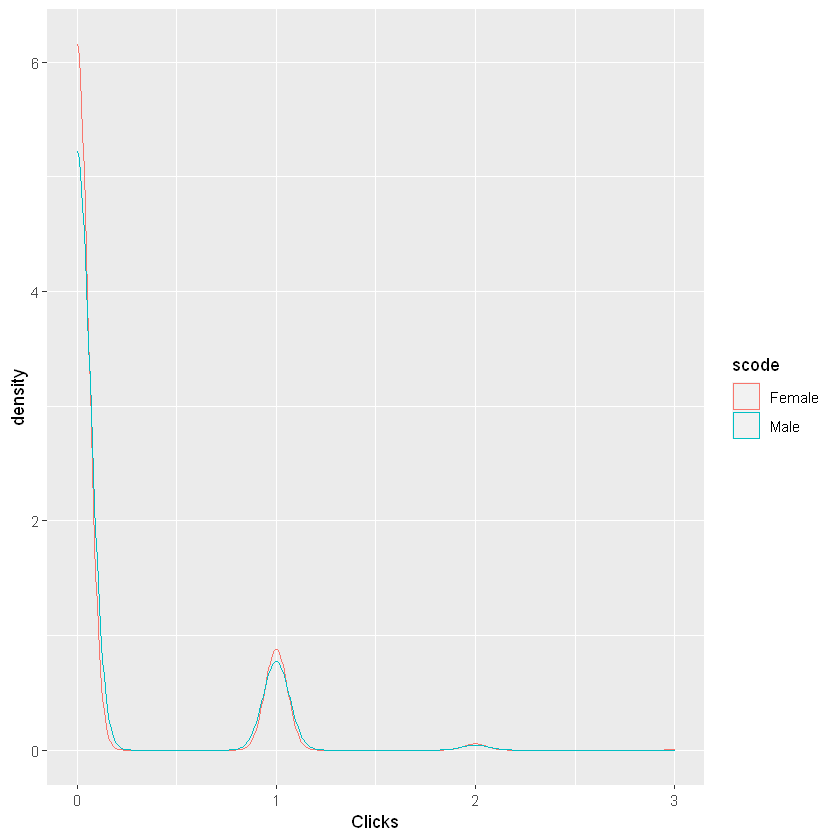

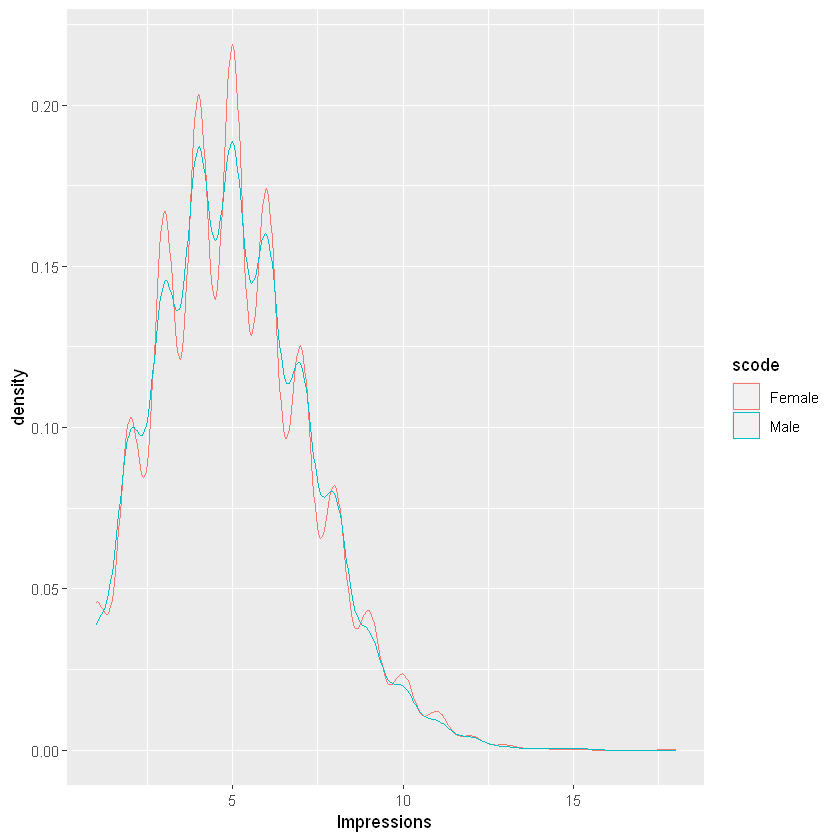

In [12]:
#Plot the differences in Clicks into graph
ggplot(data21UnderAge18, aes(x=Clicks,
colour=scode)) + geom_density()

#Plot the differences in Impressions into graph
ggplot(data21UnderAge18, aes(x=Impressions,
colour=scode)) + geom_density()

##### The two density graph above plots the results into graph and shows the differences of Male and Female in the Clicks and Impressions.

### {C} Important Summary of the data, including CTR, Quantiles, Mean, Variance, and Max.


In [9]:
data21 <- subset(data21, Clicks>0)

In [10]:
#Split the data into subsets by age 
data0to29 <- subset(data21 , Age<30)

data30to39 <- subset(data21 , Age<40)
data30to39 <- subset(data30to39 , Age>29)

data40to49 <- subset(data21 , Age<50)
data40to49 <- subset(data40to49 , Age>39)

data50to59 <- subset(data21 , Age<60)
data50to59 <- subset(data50to59 , Age>49)

data60Above <- subset(data21 , Age>59)


In [11]:
#Calculate the CTR for each age group
data0to29$CTR <- data0to29$Clicks/data0to29$Impression
summary(data0to29$CTR)
data30to39$CTR <- data30to39$Clicks/data30to39$Impression
summary(data30to39$CTR)
data40to49$CTR <- data40to49$Clicks/data40to49$Impression
summary(data40to49$CTR)
data50to59$CTR <- data50to59$Clicks/data50to59$Impression
summary(data50to59$CTR)
data60Above$CTR <- data60Above$Clicks/data60Above$Impression
summary(data60Above$CTR)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.05882 0.14286 0.16667 0.20724 0.25000 1.00000 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.07143 0.14286 0.16667 0.20263 0.25000 1.00000 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.05882 0.14286 0.16667 0.20290 0.25000 1.00000 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0625  0.1429  0.1667  0.2078  0.2500  1.0000 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.06667 0.14286 0.16667 0.21218 0.25000 1.00000 

##### The results above display important summary of the data by "summary()", which includes the five quantiles, mean and max. By this result, it shows the differences of CTR's 5 quantiles and mean of every age group.

In [12]:
#Summary of CLicks of the whole data
summaryBy(Clicks~agecat,data=data21, FUN = datasummary)

agecat,Clicks.FUN1,Clicks.FUN2,Clicks.FUN3,Clicks.FUN4,Clicks.FUN5,Clicks.FUN6,Clicks.FUN7,Clicks.FUN8
"(0,30]",1,1,1,1,4,1.042614,0.04389917,4
"(30,39]",1,1,1,1,2,1.025870,0.02521277,2
"(39,49]",1,1,1,1,3,1.031697,0.03225091,3
"(49,59]",1,1,1,1,3,1.041570,0.04251623,3
"(59, Inf]",1,1,1,1,3,1.063056,0.06446816,3


In [13]:
#Summary of Impressions of the whole data
summaryBy(Impressions~agecat,data=data21, FUN = datasummary)

agecat,Impressions.FUN1,Impressions.FUN2,Impressions.FUN3,Impressions.FUN4,Impressions.FUN5,Impressions.FUN6,Impressions.FUN7,Impressions.FUN8
"(0,30]",1,4,6,7,17,5.978582,5.034214,17
"(30,39]",1,4,6,7,14,5.932267,4.866940,14
"(39,49]",1,4,6,7,17,6.025512,5.089063,17
"(49,59]",1,4,6,7,16,5.948786,4.863644,16
"(59, Inf]",1,4,6,7,15,5.896837,4.777403,15


##### The above metrics are the summary of Clicks and Impressions of all data, I have put all the data in the functions, so from FUN1 to FUN5 is the quantiles of the data, represent 0%, 25%, 50%, 75%, 100% respectively, and FUN6 is the mean of the data, FUN7 is the variance of data and FUN8 is the maximum of data. All data are still splitted by age group and this two attributes are the most important part of the data, that is why I chosen these two attributes.

## [2] For 10 Days

### Read Data

#### Please make sure your data sets are stored in the same file with this script.

In [14]:
#Set work directory(change the working directory to your data file)
setwd("C:/Users/user1/Documents/303 lab/dds_datasets/10daysdataset")
getwd()

[1] "C:/Users/user1/Documents/303 lab/dds_datasets/10daysdataset"

In [15]:
#Read Data File 
data21 <- read.csv("nyt21.csv")
data22 <- read.csv("nyt22.csv")
data23 <- read.csv("nyt23.csv")
data24 <- read.csv("nyt24.csv")
data25 <- read.csv("nyt25.csv")
data26 <- read.csv("nyt26.csv")
data27 <- read.csv("nyt27.csv")
data28 <- read.csv("nyt28.csv")
data29 <- read.csv("nyt29.csv")
data30 <- read.csv("nyt30.csv")


In [16]:
#Merge 10 days data into one data
tendaysdata = rbind(data21,data22,data23,data24,data25,data26,data27,data28,data29,data30)


In [17]:
#Print some basic information
print(head(tendaysdata))
print(str(tendaysdata))

  Age Gender Impressions Clicks Signed_In
1   0      0           3      0         0
2   0      0           5      0         0
3  56      1           4      0         1
4  23      1           3      0         1
5   0      0           6      0         0
6  52      0           5      0         1
'data.frame':	4668800 obs. of  5 variables:
 $ Age        : int  0 0 56 23 0 52 52 53 0 22 ...
 $ Gender     : int  0 0 1 1 0 0 1 1 0 0 ...
 $ Impressions: int  3 5 4 3 6 5 3 5 6 4 ...
 $ Clicks     : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Signed_In  : int  0 0 1 1 0 1 1 1 0 1 ...
NULL


### Clean the data that are not useful

In [18]:
#Rows and columns before cleaning (just for clearly see the differences)
print(paste0("column before cleaning: ", ncol(tendaysdata)))
print(paste0("row before cleaning: ", nrow(tendaysdata)))

#Clean Data(exclude the data that have impressions<0 and age<0)
tendaysdata <- subset(tendaysdata , Impressions > 0)
tendaysdata <- subset(tendaysdata , Age > 0)

#Rows and columns after cleaning (just for clearly see the differences)
print(paste0("column after cleaning: ", ncol(tendaysdata)))
print(paste0("row after cleaning: ", nrow(tendaysdata)))


[1] "column before cleaning: 5"
[1] "row before cleaning: 4668800"
[1] "column after cleaning: 5"
[1] "row after cleaning: 2550520"


### {A} Plot the distributions of number impressions and click-through-rate (CTR=# clicks/# impressions) for the 5 age categories as "<30", "30-39","40-49", "50-59", "60+"

In [19]:
#Set agecat to put data into groups by age
tendaysdata$agecat <- cut(tendaysdata$Age,c(-Inf, 0, 30, 39, 49, 59, Inf))
summaryBy(Clicks+Impressions~agecat, data = tendaysdata)

cat("Summary of data grouped by age: \n\n")
print(summary(tendaysdata$agecat))

cat("\n Summary of data's CTR by 5 quantiles: \n\n")
print(summary(tendaysdata$Clicks/tendaysdata$Impressions))


agecat,Clicks.mean,Impressions.mean
"(0,30]",0.06850694,5.034035
"(30,39]",0.04975922,5.028525
"(39,49]",0.05062459,5.025758
"(49,59]",0.07138040,5.032028
"(59, Inf]",0.12974736,5.037235


Summary of data grouped by age: 

 (-Inf,0]    (0,30]   (30,39]   (39,49]   (49,59] (59, Inf] 
        0    713227    459955    536992    432962    407384 

 Summary of data's CTR by 5 quantiles: 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.00000 0.00000 0.00000 0.01424 0.00000 1.00000 


### Plot the data into graph
#### (1) Plot impression and clicks in age groups

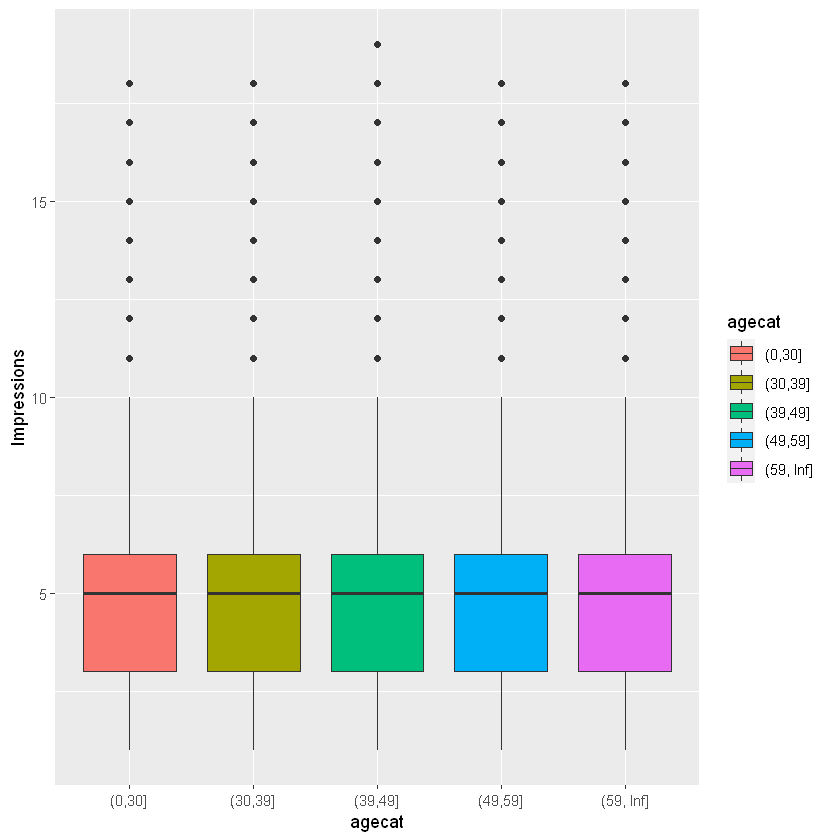

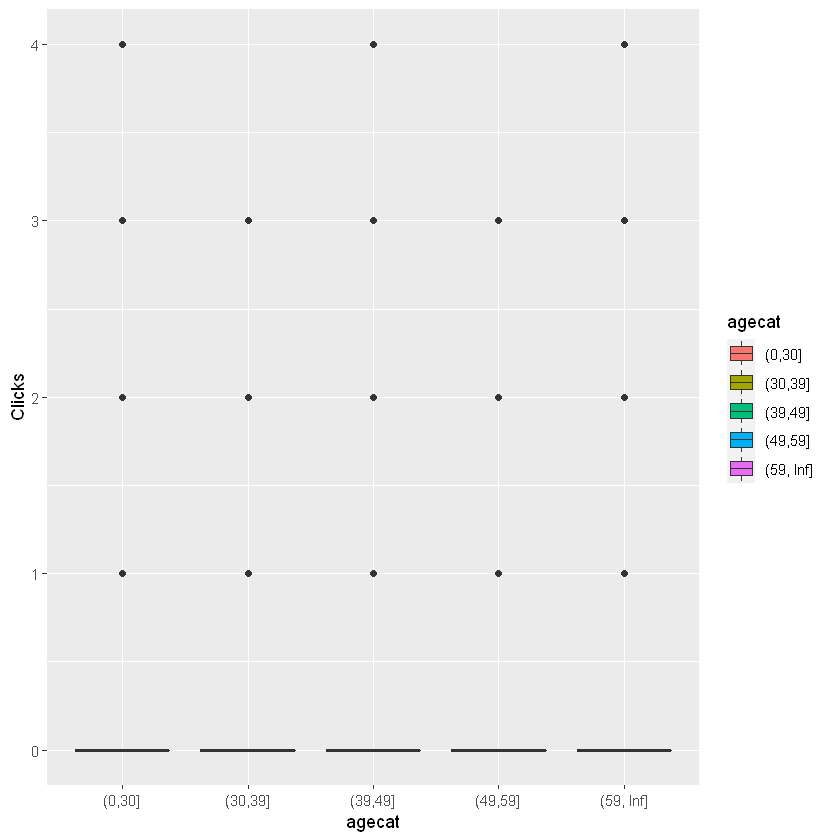

In [16]:
#Plot the data into boxplot
ggplot(tendaysdata, aes(x=agecat, y=Impressions, fill=agecat)) +
geom_boxplot()
ggplot(tendaysdata, aes(x=agecat, y=Clicks, fill=agecat)) +
geom_boxplot()

#### (2)Plot CTR (Impressons > 0) in age groups

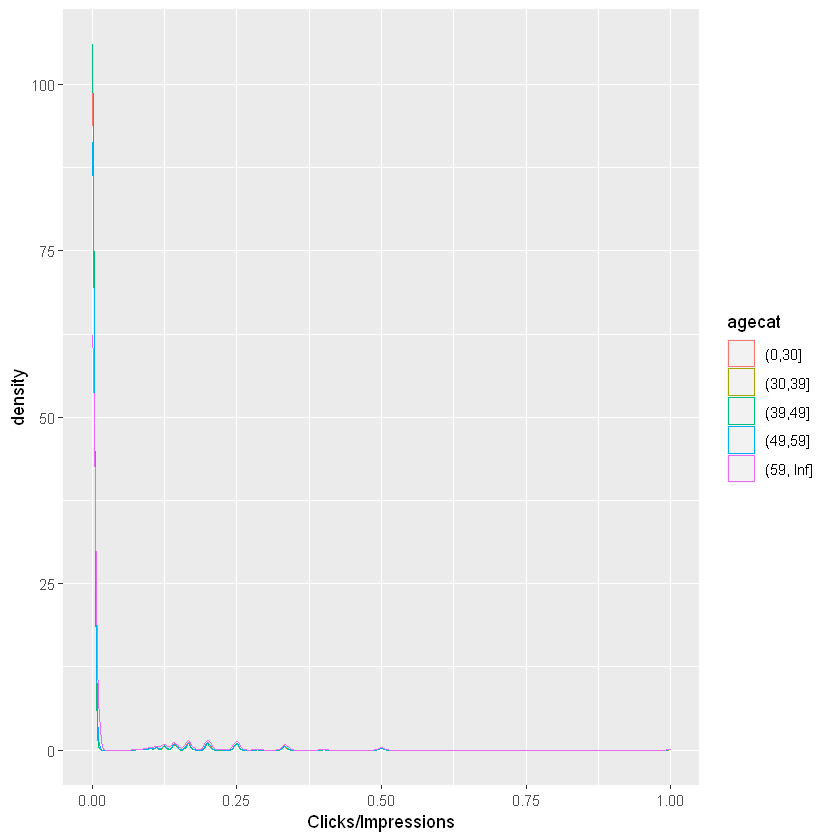

In [22]:
ggplot(subset(tendaysdata, Impressions>0), aes(x=Clicks/Impressions, colour=agecat)) + geom_density()


#### (3)Plot CTR (Clicks > 0) in age groups

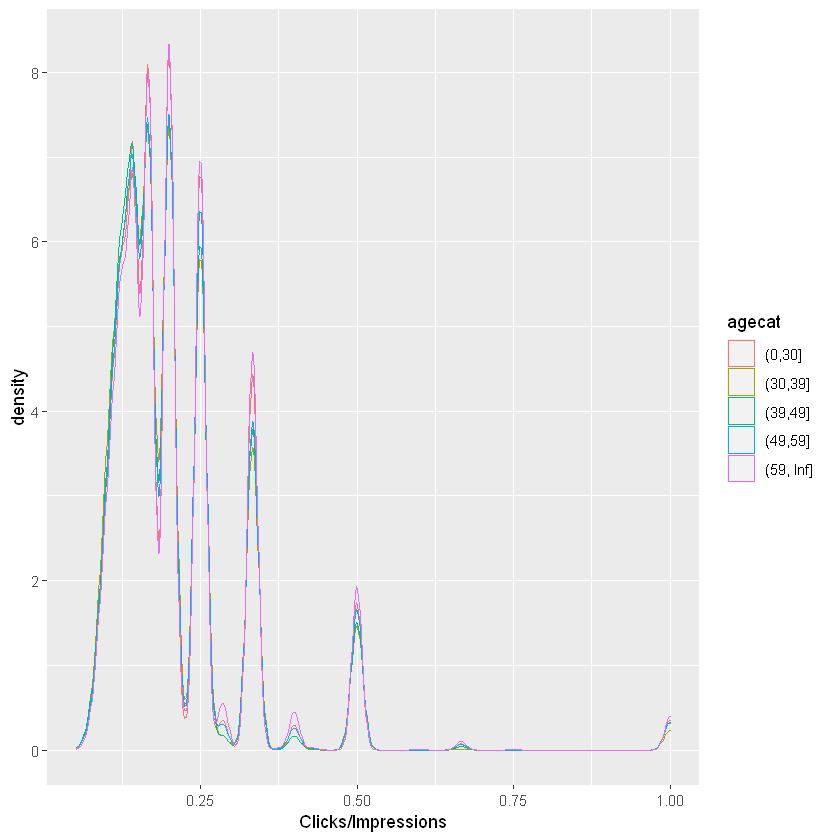

In [23]:
ggplot(subset(tendaysdata, Clicks>0), aes(x=Clicks/Impressions, colour=agecat)) + geom_density()


### {B} Explore the data and make visual (plotting) and quantitative comparisons (table) across user demographics age<18 males versus age<18 females.

In [25]:
#Create scode with value "Male" and "Female"(where gender=0 represent male and gender=1 represent female.) 
tendaysdata$scode[tendaysdata$Gender==0] <- "Male"
tendaysdata$scode[tendaysdata$Gender==1] <-"Female"
tendaysdata$scode <- factor(tendaysdata$scode)

In [26]:
#Set different groups for further use
tendaysdata$agecat1 <- cut(tendaysdata$Age,c(0, 18, Inf))
tendaysdata$gendercat1 <- cut(tendaysdata$Age,c( 0, 1, Inf))
tendaysdataUnderAge18 <- subset(tendaysdata, Age<18)


In [27]:
#Create etable to display the difference of male and female under 18 on the Clicks and Impressions
clen <- function(x){c(length(x))}
etable <-summaryBy(Gender~scode+agecat1+Clicks+Impressions,data=tendaysdataUnderAge18, FUN=clen)
summaryBy(Gender~scode+agecat1+Clicks,data=tendaysdataUnderAge18,FUN=clen)
summaryBy(Gender~scode+agecat1+Impressions,data=tendaysdataUnderAge18,FUN=clen)


scode,agecat1,Clicks,Gender.clen
Female,"(0,18]",1,9714
Female,"(0,18]",2,709
Female,"(0,18]",3,37
Female,"(0,18]",4,3
Male,"(0,18]",1,4589
Male,"(0,18]",2,327
Male,"(0,18]",3,17


scode,agecat1,Impressions,Gender.clen
Female,"(0,18]",1,66
Female,"(0,18]",2,353
Female,"(0,18]",3,922
Female,"(0,18]",4,1530
Female,"(0,18]",5,1925
Female,"(0,18]",6,1770
Female,"(0,18]",7,1523
Female,"(0,18]",8,1077
Female,"(0,18]",9,666
Female,"(0,18]",10,330


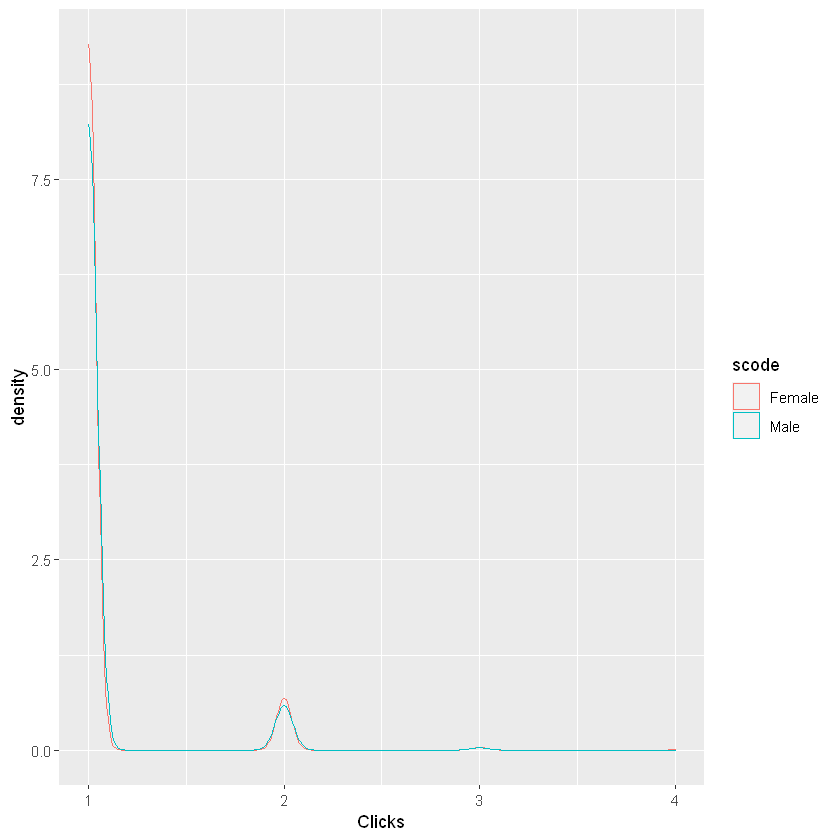

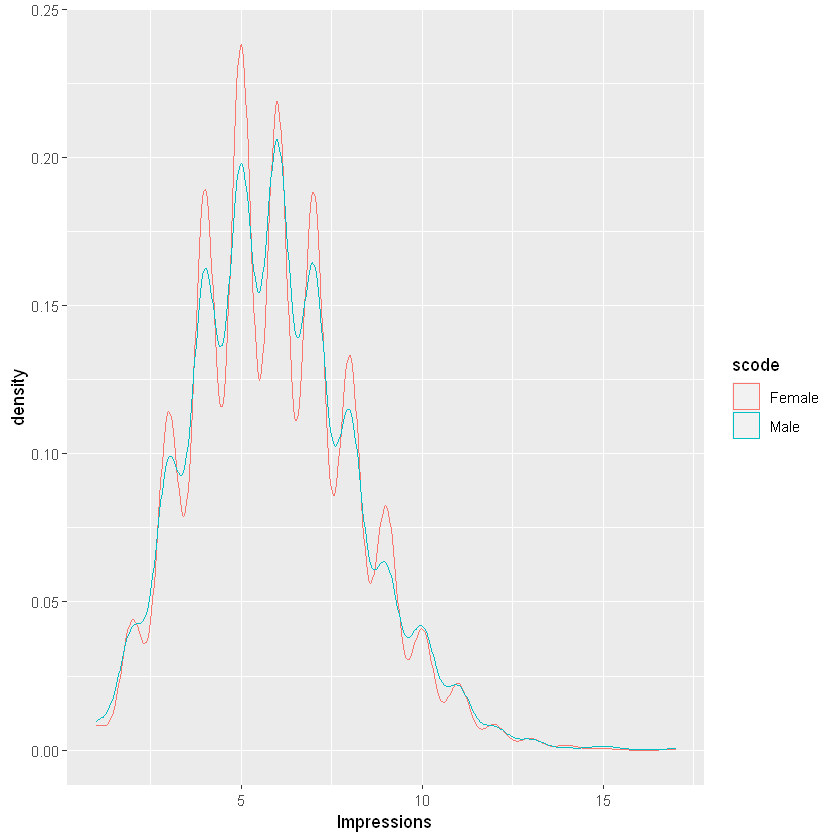

In [28]:
#Plot the differences in Clicks into graph
ggplot(tendaysdataUnderAge18, aes(x=Clicks,
colour=scode)) + geom_density()

#Plot the differences in Impressions into graph
ggplot(tendaysdataUnderAge18, aes(x=Impressions,
colour=scode)) + geom_density()

### {C} Important Summary of the data, including CTR, Quantiles, Mean, Variance, and Max.

In [20]:
tendaysdata<- subset(tendaysdata, Clicks>0)


In [21]:
#Split the data into five subsets by age 
data0to29 <- subset(tendaysdata , Age<30)

data30to39 <- subset(tendaysdata , Age<40)
data30to39 <- subset(data30to39 , Age>29)

data40to49 <- subset(tendaysdata , Age<50)
data40to49 <- subset(data40to49 , Age>39)

data50to59 <- subset(tendaysdata , Age<60)
data50to59 <- subset(data50to59 , Age>49)

data60Above <- subset(tendaysdata , Age>59)


In [22]:
#Calculate the CTR for each age
data0to29$CTR <- data0to29$Clicks/data0to29$Impression
summary(data0to29$CTR)
data30to39$CTR <- data30to39$Clicks/data30to39$Impression
summary(data30to39$CTR)
data40to49$CTR <- data40to49$Clicks/data40to49$Impression
summary(data40to49$CTR)
data50to59$CTR <- data50to59$Clicks/data50to59$Impression
summary(data0to29$CTR)
data60Above$CTR <- data60Above$Clicks/data60Above$Impression
summary(data60Above$CTR)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.05882 0.14286 0.16667 0.20756 0.25000 1.00000 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.05882 0.14286 0.16667 0.20238 0.25000 1.00000 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.05263 0.14286 0.16667 0.20411 0.25000 1.00000 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.05882 0.14286 0.16667 0.20756 0.25000 1.00000 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0625  0.1429  0.1818  0.2129  0.2500  1.0000 

In [23]:
#Summary of CLicks of the whole data
summaryBy(Clicks~agecat,data= tendaysdata, FUN = datasummary)


agecat,Clicks.FUN1,Clicks.FUN2,Clicks.FUN3,Clicks.FUN4,Clicks.FUN5,Clicks.FUN6,Clicks.FUN7,Clicks.FUN8
"(0,30]",1,1,1,1,4,1.044440,0.04601460,4
"(30,39]",1,1,1,1,3,1.023981,0.02403339,3
"(39,49]",1,1,1,1,4,1.025772,0.02631591,4
"(49,59]",1,1,1,1,3,1.041484,0.04205618,3
"(59, Inf]",1,1,1,1,4,1.067452,0.06851748,4


In [24]:
#Summary of Impressions of the whole data
summaryBy(Impressions~agecat,data= tendaysdata, FUN = datasummary)


agecat,Impressions.FUN1,Impressions.FUN2,Impressions.FUN3,Impressions.FUN4,Impressions.FUN5,Impressions.FUN6,Impressions.FUN7,Impressions.FUN8
"(0,30]",1,4,6,7,17,5.952439,4.964733,17
"(30,39]",1,4,6,7,17,5.989665,4.993674,17
"(39,49]",1,4,6,7,19,5.970002,4.951177,19
"(49,59]",1,4,6,7,18,5.945272,4.920201,18
"(59, Inf]",1,4,6,7,18,5.915948,4.924836,18
